# TA 4

In [2]:
import pandas as pd 
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from pca import pca
import seaborn as sns

C:\Users\nadav\.conda\envs\renv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nadav\.conda\envs\renv\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\nadav\.conda\envs\renv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)
In C:\Users\nadav\.conda\envs\renv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\nadav\.conda\envs\renv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\nadav\.conda\envs\renv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' 

# PCA

### PCA/SVD as the best low-rank approximation for a matrix 

As discussed in class, we've seen that PCA is dimension reduction method, which is used a lot as tool for unsupervised learning. 
As seen in class, they way to find the PC and "weights" is to use SVD. Today I want to show why we can use SVD method to find the PC, and how PCA is linked to finding the PC which maximizes variance. 

Before starting, we can ask when does it can be useful to use PCA? 
- Multicollinearity\Redundancy
- Noisy observations 

To get some insight on the PCA method (and factor models). Assume we observe a data matrix $X \in \R^{n\times p}$ , consider the following DGP

$$
f(\lambda)=\mu+\mathbf{V}_{q} \lambda
$$

where $\mu$ is a mean vector, $V_q$ is a $p \times q$ of q orthogonal unit vectors and $\lambda$ is q vector of parameters. Fitting this model to the data is done by solving 

$$
\min_{\mu,\{\lambda_i\},V_q} \sum_{i}^N |x_i - \mu - V_q \lambda_i|^2
$$

Holding $V_q$ fixed, using FWL type argument, and the fact that $(V_q' V_q)^{-1} = I$  we have 

$$
\begin{aligned}
\hat{\mu}  &= \bar{x} \\ 
\hat{\lambda_i}  & = V_k^T(x_i - \bar{x})
\end{aligned}
$$

Plugging it back into the initial problem gives us 

$$
\min_{V_q} \sum_i^N |\tilde{x_i} - V_q V_q^T \tilde{x_i}|^2
$$

where $\tilde{x}_i$ is the demeaned $x_i$. From now on, I'm going to write $x_i$, but we are working with the demeaned x's. Notice that as $V_q$ is orthonormal matrix, we have that $V_q V_q^T$ is a projection matrix, and therefore matching the data to the model sums up to find a projection matrix that minimizes the errors. 

We first start by focusing on the special case where $q=1$, which implies we want to project our data onto a line. Consider the data point $x_i$. We want to minimize the residual in this figure 

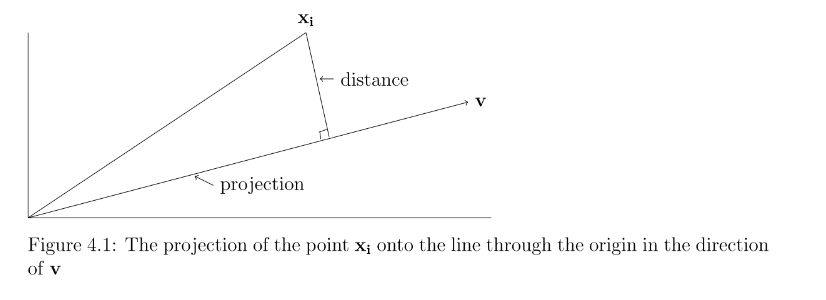


Using Pythagorean theorem we have that 

$$
\sum_p x_{i,p}^2 = (\text{Distance of projection from origin})^2 + (Residual)^2
$$

Rearranging, gives us 

$$
(Residual)^2 = \sum_p x_{i,p}^2 - (\text{Distance of projection from origin})^2 + 
$$

As $\sum_p x_{i,p}^2$ is fixed, we can see that minimizing the sum of squared residuals is the same as maximizing the sum of the squared distances of the projection points from the origin. 


To find that distance, noticed that the "projected" point is given by 

$$
v'(x_i - P(x_i)v) = 0 \implies P(x_i) = \frac{v' x_i}{v' v} \implies P(x_i)v = v' x_iv
$$

where $P(x_i)$ is the projection "matrix" of point $x_i$ on v. Using the fact the $v$ is unit size vectors we have that the length of of the projection point is given by $v' x_i$,. To see that notice that 

$$
\sqrt{(v'x v)^2} = v'x \sqrt((v)^2)  = v'x
$$

Therefore, to solve for $v$ that maximizes the sum of squared distances of the projected points from the origin, we solve 

$$
v = arg\max_{|v|=1} \frac{1}{N} \sum_i (v' x_i )^2
$$

Before moving on, notice that 

$$
\frac{1}{N} \sum_i (v' x_i) = \bigg(\frac{1}{N} \sum_i v'x_i \bigg)^2 + \hat{var}(v'x_i) = \hat{var}(v'x_i)
$$
where we used the fact that we work the demeand variables. This implies that minimizing the the sum of residual is the same as finding the a linear combination of the column of $X$ that maximizes the sample variance.

Next, writing the expression in a matrix form 

$$
\begin{aligned}
\frac{1}{N} \sum_i (v' x_i )^2 & = \frac{1}{N} (Xv)'(Xv) \\
& = \frac{1}{N}  v'X'Xv) \\
& =  v'\frac{X'X}{N}v) \\
& =  v'Sv
\end{aligned}
$$

Where X is $n\times p$ matrix, and $S$ is the sample covariance matrix. Using the matrix notation we can write the Lagrangian of our original maximization problem

$$
\mathcal{L}(v,\lambda) = v'Sv - \lambda(v'v - 1)  \\
\frac{\partial \mathcal{L}}{\partial  \lambda} = v'v - 1 \\
\frac{\partial  \mathcal{L}}{\partial  v} = 2Sv - 2\lambda v 
$$

Setting the derivatives to zeros, implies

$$
W'W = 1 \\
Sv = \lambda v 
$$

so the solution is unit length eigenvector of $S = X'X$, and maximization would be the eigenvector that is associated with the highest eigenvalue!

Now consider we set $q=2$, then following similar logic we can solve for the second $v$ as 

$$
v_2 = arg\max_{v_2' v_1 = 0,  |v_2|=1} \frac{1}{N} (v_2' x_i )^2
$$

and if we set $q=3$ we solve 

$$
v_3 = arg\max_{v_3' v_1 = ,V_3 v_2 = 0  |v_2|=1} \frac{1}{N} (v_2' x_i )^2
$$

It can be shown (but we won't) that this sequential method finds $V_q$ that solves our initial minimization problem for general $V_q$. So we can see that we can solve for $V_q$ using a sequential maximization, and that each maximization is going to give us a weakly lower $\lambda$.

The last thing we want to see is how this approached is linked to the SVD we used in class. Define for each $v_i$ a matching $u$ as $u_i = Xv_i/ \sqrt{\lambda_i} $ and note that 

$$
X'u_i = X'Xv_i / \sqrt{\lambda}_i = \sqrt{\lambda_i} v_i \\
X X' u_i = \sqrt{\lambda_i} X v_i = \lambda_i u_i 
$$

which implies that $u_i$ is eigenvalue of $XX'$. We can also show that, as required, the $u$'s are orthonormal 

$$
u_i ' u_j = \frac{v_i X' X v_j}{\lambda_i} = v_i v_j = \begin{cases} 1 & i=j \\ 0 & otherwise\end{cases}
$$
where we used the fact that $v_j$ is a eigenvector of $X'X$ and themselves orthonormal. Last, notice that (I'm assuming for simplicity that X is full rank, otherwise we need to add zeros to the Us) 

$$
(U' X V)_{i,j} = u_i' X v_j = \sqrt{\lambda_i} u_i u_j  
$$

which implies 

$$
U'X V = \Lambda \implies X = U \Lambda V'
$$
which is the SVD decomposition. 

Just to sum up so we can see that PCA/SVD gives us the best linear approximation of specific rank to the original data matrix

##### Sources

There are plenty resources on PCA and SVD. 
A good note I've found is [here](https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf) by Jon Shlens. 
A good mathematical discussion can be found [here](https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf) and [here](http://www.cs.cmu.edu/~venkatg/teaching/CStheory-infoage/SVD-chap.pdf). Gilbert Strang's book - introduction to linear algebra is also a good source SVD and PCA, and of course the-always-there-for-you "Elements of Statistical Learning"

In [3]:
prData = pd.read_csv('protein.csv')
names = [i.lstrip() for i in prData.columns]
prData.columns = names

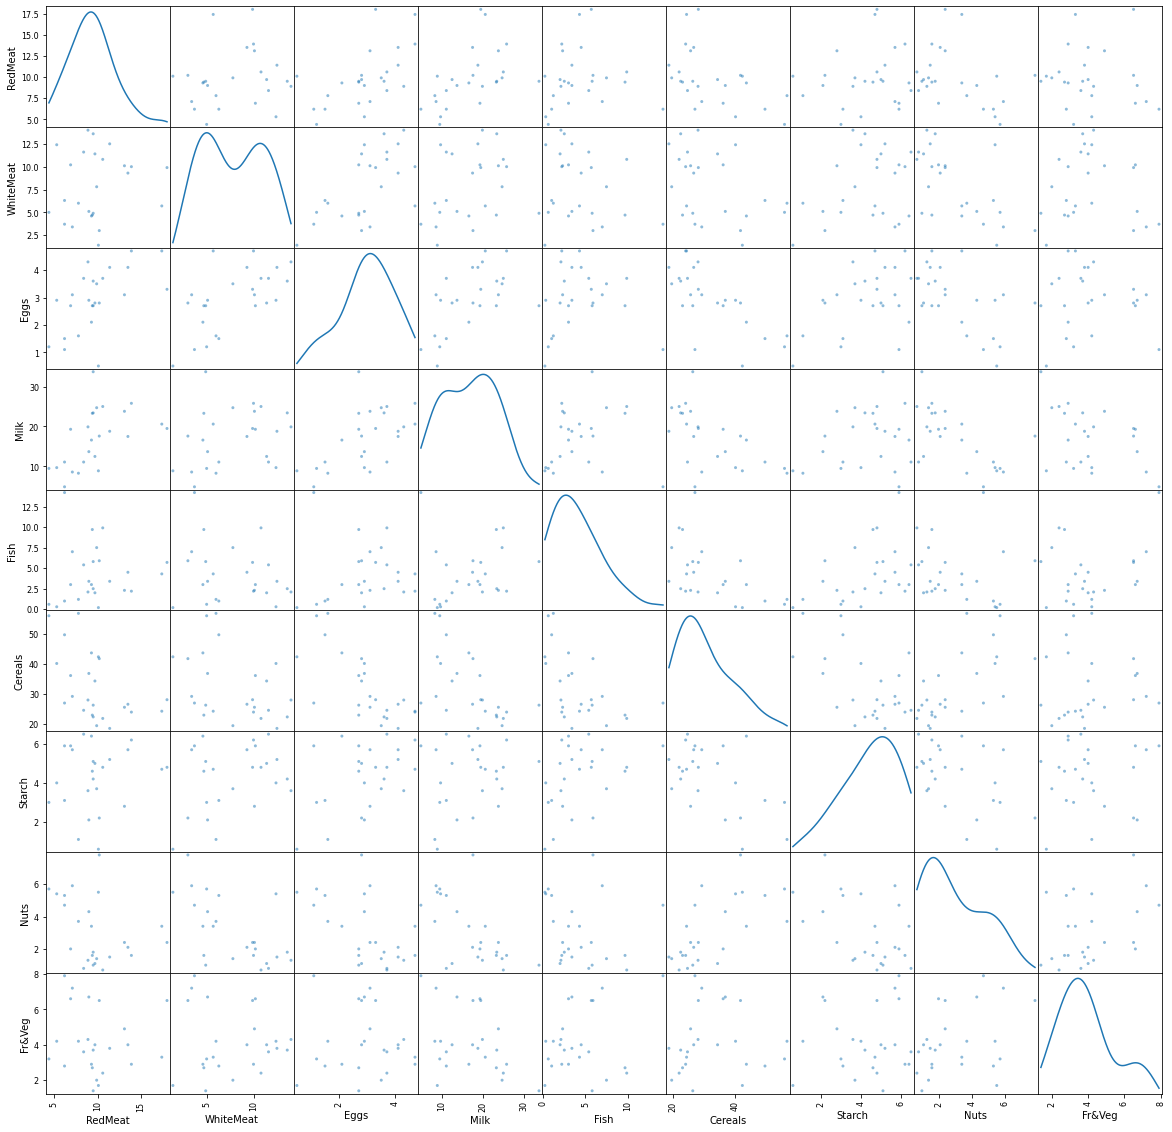

In [4]:
#Plotting two variables against each other
scatter_matrix(prData, figsize=(20, 20), diagonal='kde');

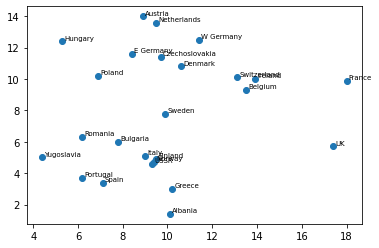

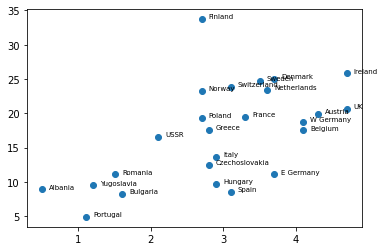

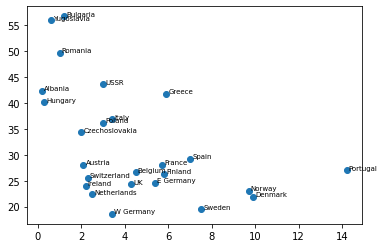

In [5]:
def plotWithLabels(col1,col2,labels):
    plt.scatter(col1,col2)
    for i in range(col1.shape[0]):
        plt.text(x=col1[i]+0.1,y=col2[i]+0.1,s=labels[i], fontdict=dict(color='black',size=7))
    plt.show()
    

plotWithLabels(prData['RedMeat'],prData['WhiteMeat'],prData['Country'])
plotWithLabels(prData['Eggs'],prData['Milk'],prData['Country'])
plotWithLabels(prData['Fish'],prData['Cereals'],prData['Country'])


In [6]:
#First, let's scale the data 
prData.iloc[:,1:] = prData.iloc[:,1:]-prData.iloc[:,1:].mean(axis=0)
prData.iloc[:,1:] = prData.iloc[:,1:]/prData.iloc[:,1:].std(axis=0)

#Sanity Check
#STD
print(prData.iloc[:,1:].std())
#Mean
print(prData.iloc[:,1:].mean())


RedMeat      1.0
WhiteMeat    1.0
Eggs         1.0
Milk         1.0
Fish         1.0
Cereals      1.0
Starch       1.0
Nuts         1.0
Fr&Veg       1.0
dtype: float64
RedMeat     -3.552714e-16
WhiteMeat    2.753353e-16
Eggs        -3.463896e-16
Milk        -2.042810e-16
Fish         6.217249e-17
Cereals     -4.085621e-16
Starch      -3.597123e-16
Nuts        -2.486900e-16
Fr&Veg      -5.240253e-16
dtype: float64


In [7]:
model = pca(n_components=prData.shape[1]-1)
results = model.fit_transform(prData.iloc[:,1:])

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [8]:
results['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,3.485367,-1.630480,1.761233,0.229658,0.023254,-1.034265,-0.471742,-0.761551,0.103253
1,-1.422669,-1.041231,-1.337804,0.168097,-0.933447,0.218428,-0.181154,0.251002,0.217446
2,-1.622032,0.159496,-0.216534,0.520726,0.755090,-0.289805,-0.195597,0.203312,0.033171
3,3.134081,-1.301066,-0.151290,0.214189,-0.484745,-0.695578,0.464782,0.808245,0.299863
4,-0.370465,-0.602668,-1.195942,-0.463982,0.256824,-0.823090,0.314948,-0.012298,0.149448
5,-2.365269,0.285446,0.752263,-0.967341,-0.752433,-0.170330,-0.225816,0.621021,-0.480279
6,-1.422211,0.450301,-1.302540,-1.135961,0.422943,-0.648312,-0.554783,0.163177,0.259901
7,-1.563856,-0.596003,2.049507,-1.415308,0.037203,0.834200,0.726230,-0.225917,0.133090
8,-1.487982,0.785365,-0.001883,1.957458,0.250459,-0.898948,0.946475,0.022220,-0.543608
9,2.239700,1.001059,0.882603,1.794320,-0.404977,1.144477,-0.147391,0.305831,-0.387965


In [9]:
results['loadings']

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
PC1,-0.302609,-0.310556,-0.426679,-0.377727,-0.135650,0.437743,-0.297248,0.420334,0.110420
PC2,-0.056252,-0.236853,-0.035336,-0.184589,0.646820,-0.233485,0.352826,0.143311,0.536190
PC3,0.297580,-0.623897,-0.181528,0.385658,0.321274,-0.095918,-0.242975,0.054388,-0.407556
PC4,0.646477,-0.036992,0.313164,-0.003318,-0.215955,-0.006204,-0.336685,0.330288,0.462056
PC5,0.322160,-0.300165,0.079110,-0.200414,-0.290031,0.238168,0.735973,0.150537,-0.233517
PC6,-0.459870,-0.121007,0.361249,0.618438,-0.136791,0.080758,0.147667,0.447010,0.118550
PC7,0.150334,-0.019664,-0.443272,0.462095,-0.106394,0.404964,0.152753,-0.407262,0.449978
PC8,0.019858,0.027876,0.491200,-0.081422,0.448732,0.702995,-0.114540,-0.183800,-0.091963
PC9,-0.246000,-0.592397,0.333386,-0.178084,-0.312826,-0.152260,-0.121858,-0.518275,0.202950


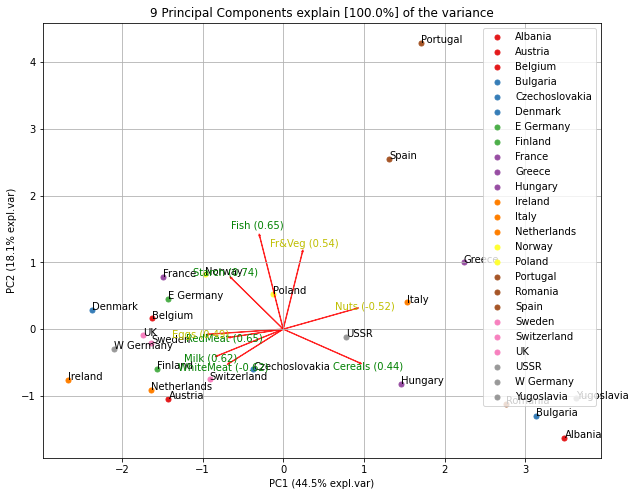

In [10]:
fig, ax = model.biplot(y=prData['Country'],n_feat=9,legend=True,label=True)

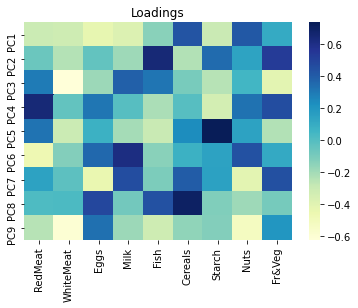

In [10]:
ax = sns.heatmap(results['loadings'],cmap='YlGnBu')
plt.title('Loadings');

In [11]:
print('Explained Variance')
for i in range(len(results['explained_var'])):
    print('PC ' + str(i+1) + ' - ' + str(results['explained_var'][i]))

Explained Variance
PC 1 - 0.4451597304067943
PC 2 - 0.6268263356549794
PC 3 - 0.7521507250117578
PC 4 - 0.8582244988826553
PC 5 - 0.9097620983742597
PC 6 - 0.9458877618613808
PC 7 - 0.97606624346796
PC 8 - 0.9889875662158426
PC 9 - 1.0000000000000002


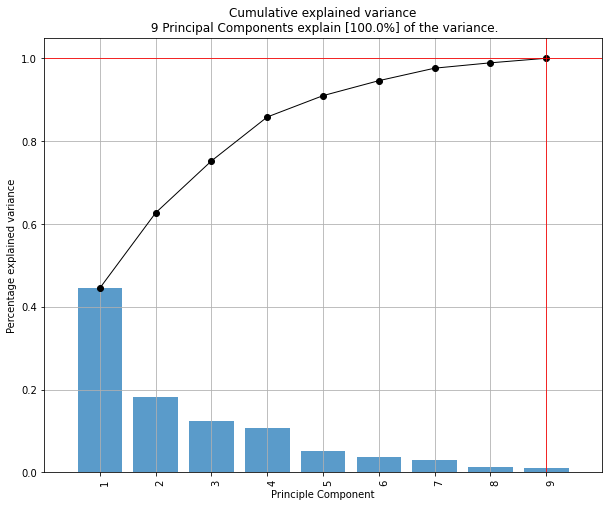

<Figure size 432x288 with 0 Axes>

In [12]:
#Scree plot 
fig, ax = model.plot()

In [13]:
dataMatrix = prData.iloc[:,1:].to_numpy()
loadings = results['loadings'].to_numpy()
#Sanity Check
(np.round(dataMatrix@loadings.T,6) == np.round(results['PC'].to_numpy(),6)).all()

True

# Factor Models using SVD

We are going to use the Exchange rates data. Here are the codebook for the countries 

- al australia
- bz brazil
- ca canada
- ch china
- dn denmark
- eu euro
- hk 'hong kong'
- in india
- jp japan
- ko 'south korea'
- ma malaysia
- mx mexico
- no norway
- nz 'new zealand'
- sd sweden
- sf 'south africa'
- si singapore
- sl 'sri lanka'
- sz switzerland
- ta taiwan
- th thailand
- uk uk
-vz venezuela


In [16]:
exData = pd.read_csv('FXmonthly.csv')
exData = pd.DataFrame((exData.iloc[1:119,:].to_numpy() - exData.iloc[0:118,:].to_numpy())/exData.iloc[0:118,:].to_numpy(),columns=exData.columns)
N = exData.shape[0]
T = exData.shape[1]
exData.head(5)

,exalus,exbzus,excaus,exchus,exdnus,exhkus,exinus,exjpus,exkous,exmaus,...,exsius,exsfus,exslus,exsdus,exszus,extaus,exthus,exukus,exvzus,exeuus
0,0.040084,0.025510,0.012241,-0.000060,0.018511,0.000013,-0.001073,-0.003771,-0.015543,0.0,...,0.003165,0.005502,0.015181,0.027479,0.023367,-0.010498,-0.011217,0.017287,0.000000,0.018564
1,0.061012,0.044616,0.024382,0.000048,0.013884,0.000000,0.001933,0.045427,0.030778,0.0,...,0.017035,0.009794,-0.016136,0.030743,0.013305,0.009032,0.031009,0.005519,0.014286,0.013439
2,0.002968,0.046719,-0.000577,-0.000048,0.017366,-0.000077,0.003001,0.018599,0.028148,0.0,...,0.021769,0.022829,0.028870,0.015112,0.013189,0.009779,0.034237,0.006789,0.000000,0.017620
3,-0.035213,0.045227,-0.010720,-0.000012,0.019114,0.000077,0.003420,-0.016159,-0.021736,0.0,...,0.001269,-0.012305,0.029964,0.014485,0.023174,0.007954,0.000681,0.005739,0.000000,0.019725
4,0.003691,0.037599,-0.010772,0.000000,0.025113,-0.000026,0.001917,0.004763,-0.002964,0.0,...,0.001599,0.010102,-0.005251,0.042671,0.018713,0.033882,-0.005755,0.017546,0.014085,0.026083


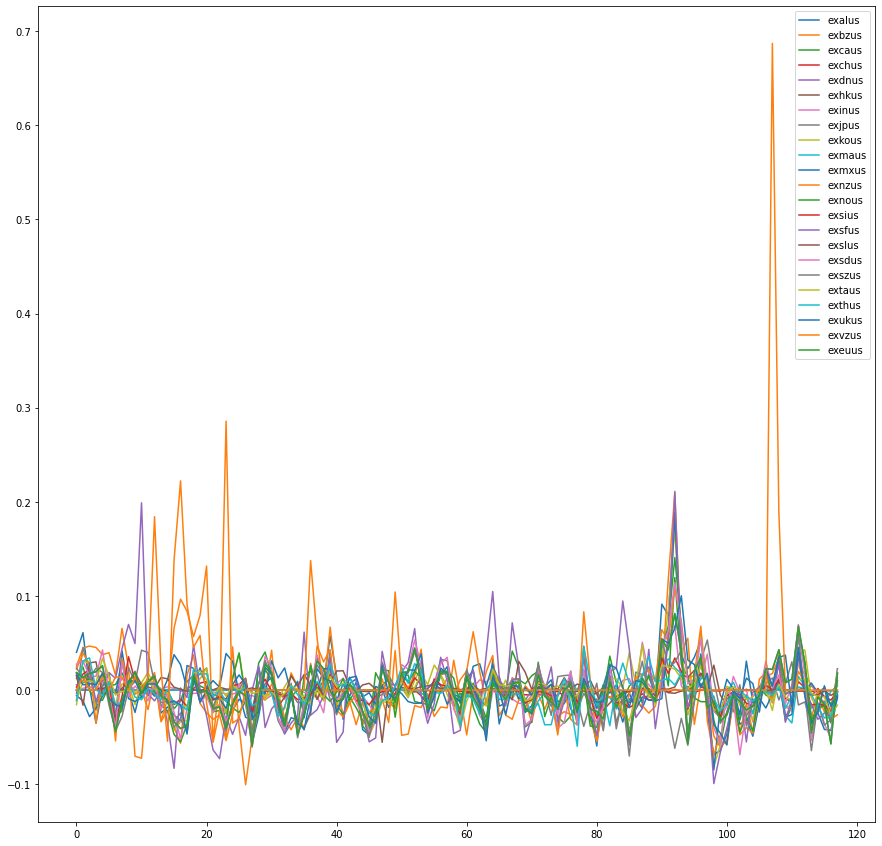

In [17]:
plt.figure(figsize=(15,15))
plt.plot(exData);
plt.legend(exData.columns);
# plt.xticks(range(exData.shape[0]),list(exData.index))
plt.show()


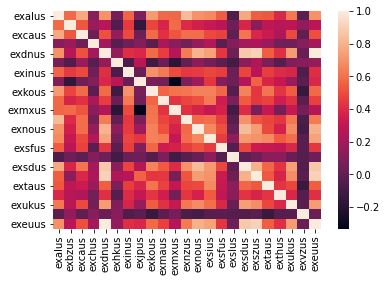

In [18]:
#Exploring correlations 
sns.heatmap(exData.corr());

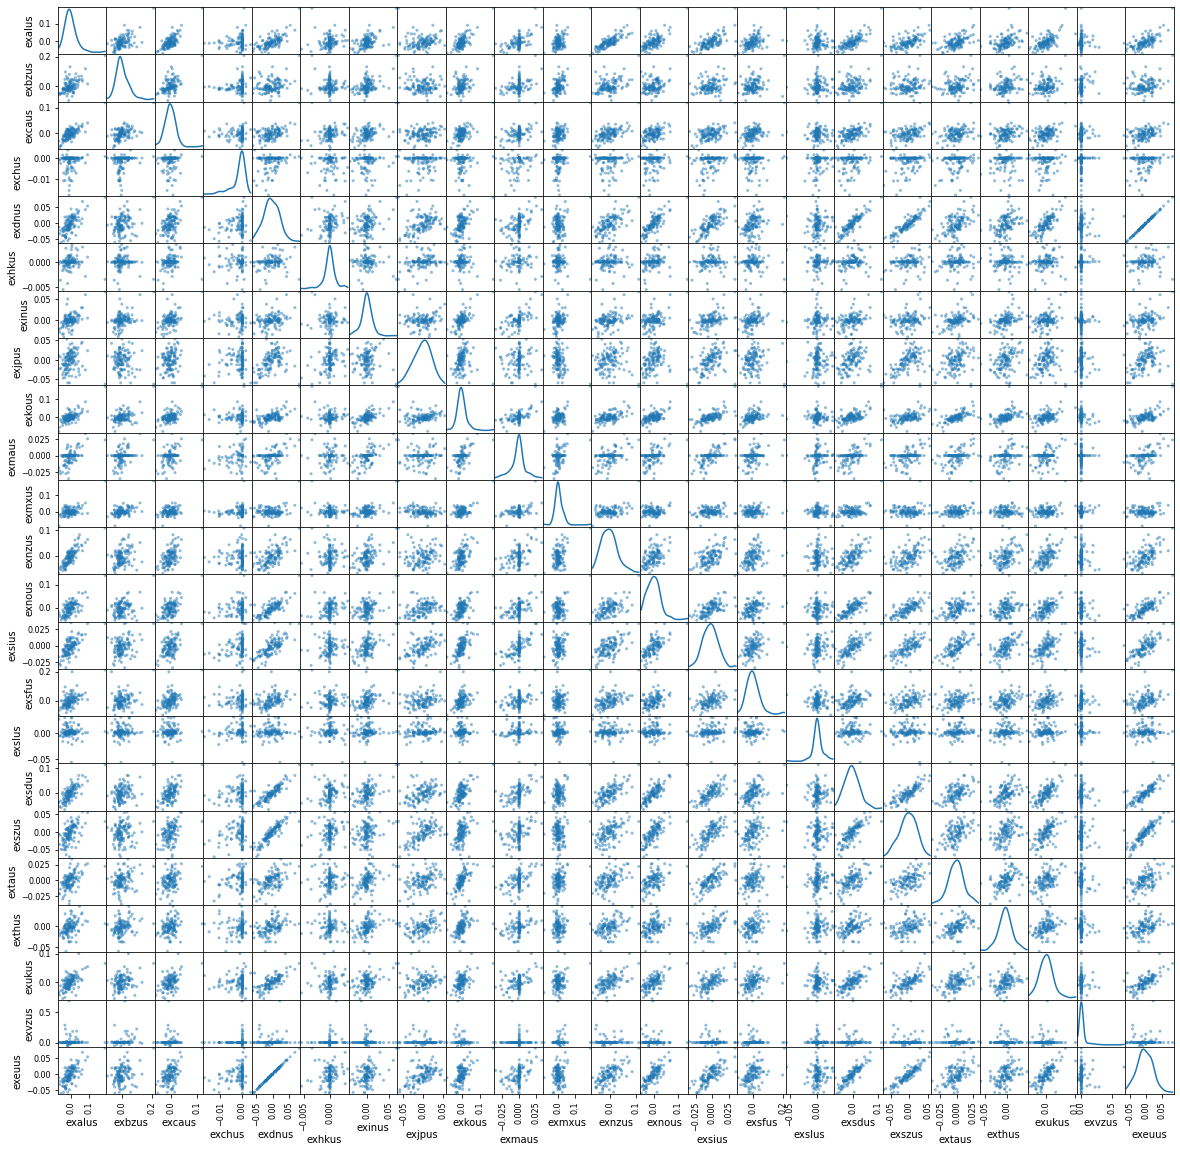

In [19]:
scatter_matrix(exData, figsize=(20, 20), diagonal='kde');

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [23] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


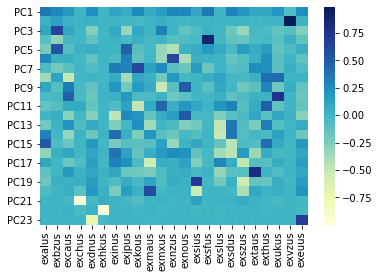

In [18]:
deMeanExData = exData - np.mean(exData,axis=0) 
modelEx = pca(n_components=deMeanExData.shape[1])
resultsEx = modelEx.fit_transform(deMeanExData)
sns.heatmap(resultsEx['loadings'],cmap='YlGnBu');


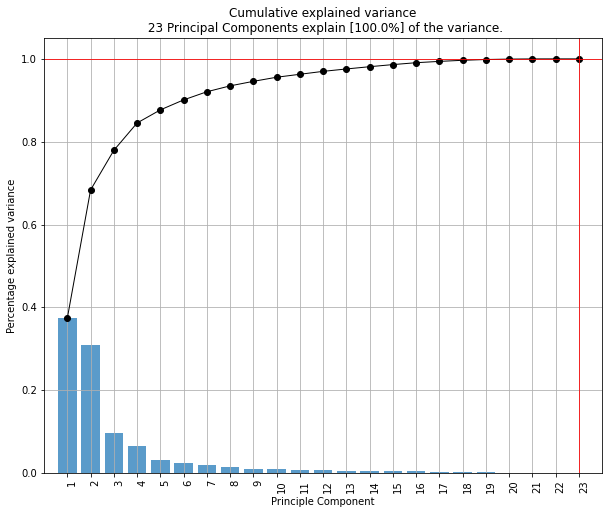

<Figure size 432x288 with 0 Axes>

In [19]:
modelEx.plot();

In [21]:
K = 3
Fhat = resultsEx['PC'].iloc[:,0:K].to_numpy()
Mus = resultsEx['loadings'].iloc[0:K].to_numpy()
Yhat = Fhat@Mus

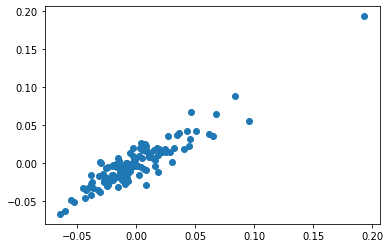

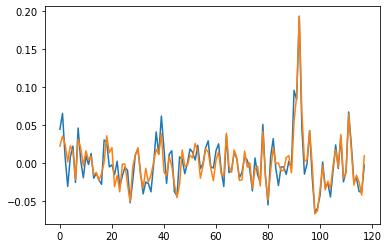

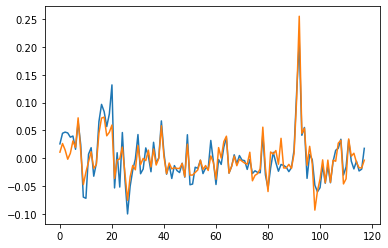

In [22]:
plt.scatter(deMeanExData.iloc[:,0],Yhat[:,0])
plt.show()

plt.plot(deMeanExData.index,deMeanExData.iloc[:,0])
plt.plot(deMeanExData.index,Yhat[:,0])
plt.show()

plt.plot(deMeanExData.index,deMeanExData.iloc[:,1])
plt.plot(deMeanExData.index,Yhat[:,1])
plt.show()